# Zestaw 5 - Całkowanie numeryczne

### Autor: Jacek Nitychoruk

## Zadanie 1

In [213]:
using QuadGK
using Polynomials
using Plots

In [214]:
function legendre(k)
    if k == 0
        return Poly([1])
    end
    if k == 1
        return Poly([0,1])
    end
    return ((2*k-1)/(k))*Poly([0,1])*legendre(k-1)-((k-1)/k)*legendre(k-2)
end



legendre (generic function with 1 method)

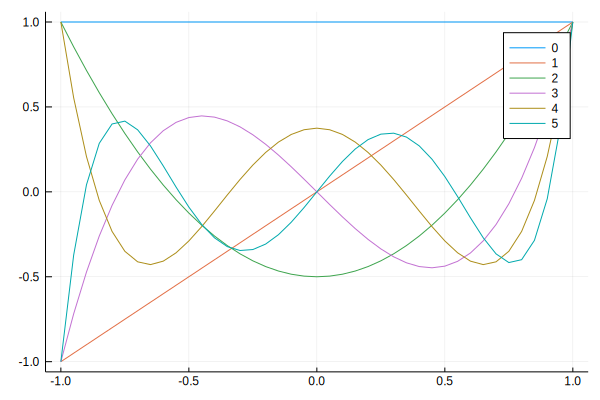

In [215]:
x = -1:0.05:1
y = polyval(legendre(0), x)
p = plot(x, y, label='0')
for i in 1:5
    y = polyval(legendre(i), x)
    plot!(x, y, label=i)
end
p

In [44]:
println("Odcięte punktów Gaussa:\t Zera wielominów:")
println("-----------------------------------------------")
for i in 2:4
    println("\tStopień ", i, ":") 
    (xp, a) = gauss(Float64, i)
    r = roots(legendre(i))
    
    xp = sort(xp)
    r = sort(r)
    
    for j in 1:length(xp)
        if xp[j] >= 0
            print(" ")
        end
        print(xp[j], " \t ")
        if r[j] >= 0
            print(" ")
        end
        println(r[j])
    end
    println("-----------------------------------------------")
end

Odcięte punktów Gaussa:	 Zera wielominów:
-----------------------------------------------
	Stopień 2:
-0.5773502691896258 	 -0.5773502691896258
 0.5773502691896258 	  0.5773502691896256
-----------------------------------------------
	Stopień 3:
-0.7745966692414834 	 -0.7745966692414834
 0.0 	  0.0
 0.7745966692414834 	  0.7745966692414833
-----------------------------------------------
	Stopień 4:
-0.8611363115940526 	 -0.8611363115940536
-0.3399810435848563 	 -0.33998104358485653
 0.3399810435848563 	  0.3399810435848563
 0.8611363115940526 	  0.8611363115940531
-----------------------------------------------


### Związek z podstawowym twierdzeniem kwadratur Gaussa:
Podstawowe twierdzenie kwadratur Gaussa mówi, że odcięte $x_i$ n-punktowej kwadratury Gaussa z funkcją ważącą $w(x)$ w $\left[ a, b\right]$ są zerami wielomianu ortogonalnego $\varphi_n(x)$ dla tego samego przedziału i tej samej funkcji ważącej. 

Dla funkcji ważącej $w(x)=1$ tym wielomianem ortogonalnym jest wielomian Legendre'a, stąd zbieżność wyników w tabeli powyżej.

## Zadanie 2

In [77]:
function integrate(f, k)
    (xp,a)=gauss(Float64,k)
    return sum(a .* f.(xp))
end

integrate (generic function with 1 method)

In [126]:
first = 1
last = 20
degree = 1
y = zeros(last-first+1)
err = zeros(last-first+1)
println("\tBŁĄD WZGLĘDNY:")
for degree in 1:10
    println("Stopień: ", degree)
    println("-------------------------------------")
    f(x) = x^degree+x^(degree-1)
    exact = (1/(degree+1))+(1/degree)-(1/(degree+1))*(-1)^(degree+1)-(1/degree)*(-1)^degree
    for i in first:last
        y[i-first+1] = integrate(f, i)
        err[i-first+1] = abs(y[i-first+1]-exact)
    end
    println(1, ":\t", err[1+first+1]/y[1-first+1])
    for i in (first+1):last
        if err[i-first]/y[i-first] > 1e-10
            println(i, ":\t", err[i-first+1]/y[i-first+1])
        end
    end
    println("")
end

	BŁĄD WZGLĘDNY:
Stopień: 1
-------------------------------------
1:	2.220446049250313e-16

Stopień: 2
-------------------------------------
1:	Inf
2:	1.6653345369377348e-16

Stopień: 3
-------------------------------------
1:	Inf
2:	3.330669073875469e-16

Stopień: 4
-------------------------------------
1:	Inf
2:	0.7999999999999993
3:	1.3877787807814454e-16

Stopień: 5
-------------------------------------
1:	Inf
2:	0.7999999999999993
3:	2.7755575615628904e-16

Stopień: 6
-------------------------------------
1:	Inf
2:	2.857142857142855
3:	0.1904761904761899
4:	3.8857805861880464e-16

Stopień: 7
-------------------------------------
1:	Inf
2:	2.857142857142854
3:	0.1904761904761899
4:	3.8857805861880464e-16

Stopień: 8
-------------------------------------
1:	Inf
2:	7.999999999999992
3:	0.5432098765432091
4:	0.05512489233419419
5:	2.4980018054066017e-16

Stopień: 9
-------------------------------------
1:	Inf
2:	7.999999999999992
3:	0.5432098765432091
4:	0.05512489233419419
5:	2.498001

### Dla wielomianu st. 10:

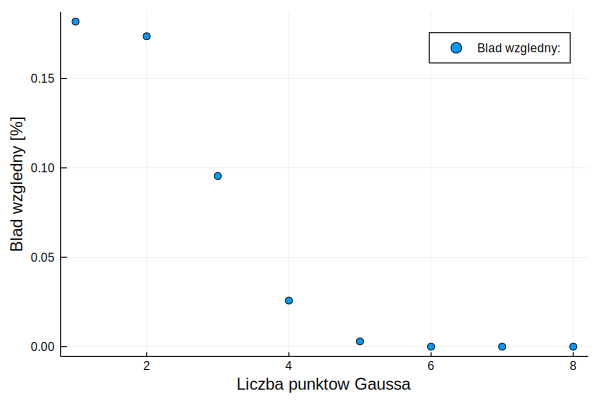

In [136]:
scatter(1:8, err, label="Blad wzgledny:", xlabel="Liczba punktow Gaussa", ylabel="Blad wzgledny [%]")

### Wniosek:
Na podstawie otrzymanych danych możemy zaobserwować zależność dokładności kwadratury od stopnia wielomianu. Dla kwadratury n-punktowej obliczona wartość jest dokładna dla wielomianów stopnia $2n-1$. 

Analogicznie - dla wielomianu stopnia n - abu uzyskać dokładn wynik, musimy użyć kwadratury ($\frac{n}{2}+1$)-punktowej.

Twierdzenie o stopniu dokładności kwadratury Gaussa mówi, że kwadratura ma stopień dokładności: $2n−1$ (dla n-punktowejkwadratury) tzn. jest dokładna dla wielomianu:
$P(x)=Q(x)*\varphi_n(x)+R(x)$, dla $Q,R$ - stopnia $< n$, co jest zgodne z powyższymi obserwacjami.

## Zadanie 3


In [144]:
function integrate2(f, k, a, b)
    g(t) = f((b+a)/2+(b-a)*t/2)*(b-a)/2
    return integrate(g, k)
end


integrate2 (generic function with 1 method)

In [147]:
first = 1
last = 20
degree = 1
y = zeros(last-first+1)
err = zeros(last-first+1)
println("\tBŁĄD WZGLĘDNY:")
for degree in 1:10
    println("Stopień: ", degree)
    println("-------------------------------------")
    f(x) = x^degree+x^(degree-1)
    exact = (1/(degree+1))*(2)^(degree+1)+(1/degree)*(2)^degree-(1/(degree+1))*(-1)^(degree+1)-(1/degree)*(-1)^degree
    for i in first:last
        y[i-first+1] = integrate2(f, i, -1, 2)
        err[i-first+1] = abs(y[i-first+1]-exact)
    end
    println(1, ":\t", err[1+first+1]/y[1-first+1])
    for i in (first+1):last
        if err[i-first]/y[i-first] > 1e-10
            println(i, ":\t", err[i-first+1]/y[i-first+1])
        end
    end
    println("")
end

	BŁĄD WZGLĘDNY:
Stopień: 1
-------------------------------------
1:	1.9737298215558337e-16

Stopień: 2
-------------------------------------
1:	3.9474596431116675e-16
2:	0.0

Stopień: 3
-------------------------------------
1:	1.578983857244667e-15
2:	1.3158198810372225e-16

Stopień: 4
-------------------------------------
1:	6.315935428978668e-15
2:	0.14999999999999974
3:	3.432573602705797e-16

Stopień: 5
-------------------------------------
1:	2.5263741715914672e-14
2:	0.3818181818181812
3:	4.155220676959649e-16

Stopień: 6
-------------------------------------
1:	5.554285714285647
2:	0.7142857142857129
3:	0.02774922918807777
4:	7.368591333808442e-16

Stopień: 7
-------------------------------------
1:	49.98857142857125
2:	1.1811846689895458
3:	0.07512107992992792
4:	7.06254760428924e-16

Stopień: 8
-------------------------------------
1:	318.8159999999993
2:	1.8214285714285696
3:	0.14431391862334653
4:	0.005047305507378121
5:	4.796912984034429e-16

Stopień: 9
---------------------

### Komentarz
Otrzymane wyniki i błędy względne w stosunku do wyników obliczonych analitycznie wskazują na poprawność normalizacji funkcji i prawidłowe obliczanie całek na dowolnym przedziale. Uzyskana dokładność jest taka sama jak przy przedziale $[-1,1]$ w zadaniu 2.

### Zadanie 4

In [167]:
f(x) = 4*x^3 + 7*x^6
println("f(x) = 4*x^3 + 7*x^6")
println("wartość dokładna: 2.0")
println("quadgk:\t", quadgk(f, -1, 1)[1])
println("----")

println("Rozkład normalny Gaussa od -inf do inf")
f2(x) = 1/sqrt(2*pi)*exp((-x^2)/2)
println("wartość dokładna: 1.0")
println("quadgk:\t", quadgk(f2, -Inf, Inf)[1])


f(x) = 4*x^3 + 7*x^6
wartość dokładna: 2.0
quadgk:	1.9999999999999996
----
Rozkład normalny Gaussa od -inf do inf
wartość dokładna: 1.0
quadgk:	1.0000000000032583


### Zadanie 5

In [170]:
function integrate_trapezoidal(f, n, a, b)
    sum = 0
    delta = (b-a)/(n-1)
    start = a
    for i in 1:(n-1)
        sum = sum + (f(start) + f(start+delta))/2 * delta
        start = start + delta
    end
    return sum
end

integrate_trapezoidal (generic function with 1 method)

### Błąd względny dla funkcji wykładniczej $f(x) = e^{2x}$ na przedziale $[-1,5]$:

Podziały 	BŁĄD WZGLĘDNY [%]:
3:	201.49094699410682
4:	107.46294414550962
5:	65.7187089473768
6:	43.94450530308207
7:	31.303528549933134
8:	23.368485393363134
9:	18.08253751833024
10:	14.393647238369228
11:	11.721531283200003
12:	9.726060280175517
13:	8.197670686932643
14:	7.001757968095131
15:	6.048767975169316
16:	5.277297673287483
17:	4.644135080175745
18:	4.118170840345709
19:	3.676555987314677
20:	3.3022082591748982
21:	2.98215290965194
22:	2.706393989049372
23:	2.4671310480933104
24:	2.2582056946140536
25:	2.0747041268399093
26:	1.9126674134586703
27:	1.7688774236708487
28:	1.6406966688999496
29:	1.525947094287245
30:	1.4228173683183962


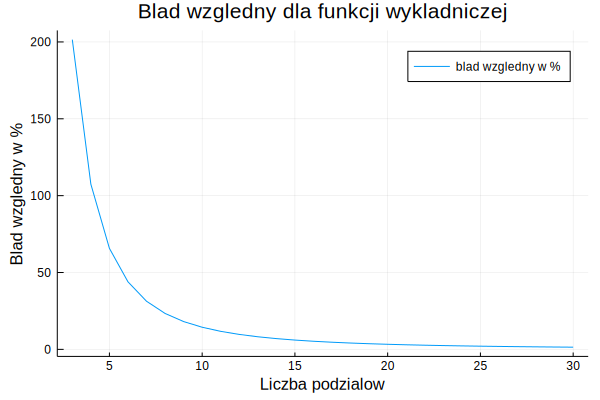

In [189]:
first = 3
last = 30
degree = 1
y = zeros(last-first+1)
err = zeros(last-first+1)
err_ = zeros(last-first+1)
println("Podziały \tBŁĄD WZGLĘDNY [%]:")
f(x) = exp(2*x)
exact = exp(2*(5))/2-exp(2*(-1))/2
for i in first:last
    y[i-first+1] = integrate_trapezoidal(f, i, -1, 5)
    err[i-first+1] = abs(y[i-first+1]-exact)
end
for i in (first):last
    err_[i-first+1] = err[i-first+1]/exact
    println(i, ":\t",err_[i-first+1]*100 )
end
plot(3:30, err_*100, label="blad wzgledny w %",title="Blad wzgledny dla funkcji wykladniczej", xlabel="Liczba podzialow", ylabel="Blad wzgledny w %")

### Błąd względny dla funkcji trygonometrycznej $f(x) = sin(x)$ na przedziale $[0,\pi]$:

Podziały 	BŁĄD WZGLĘDNY [%]:
3:	21.46018366025516
4:	9.310031788289109
5:	5.19405510314801
6:	3.311720095359738
7:	2.2951383343146614
8:	1.6841660617053833
9:	1.2884199027224597
10:	1.0174594391758274
11:	0.8238231245272676
12:	0.6806506709171156
13:	0.57181117078422
14:	0.48714123261129894
15:	0.4199786322462651
16:	0.3658084234615444
17:	0.3214828113830559
18:	0.2847527845267317
19:	0.25397682082736184
20:	0.2279340839902777
21:	0.20570136456427024
22:	0.18657006302686963
23:	0.16998898653644012
24:	0.15552417666166996
25:	0.142830209802558
26:	0.13162937271851138
27:	0.12169633679784964
28:	0.11284673207289098
29:	0.1049285267161637
30:	0.09781545147229398


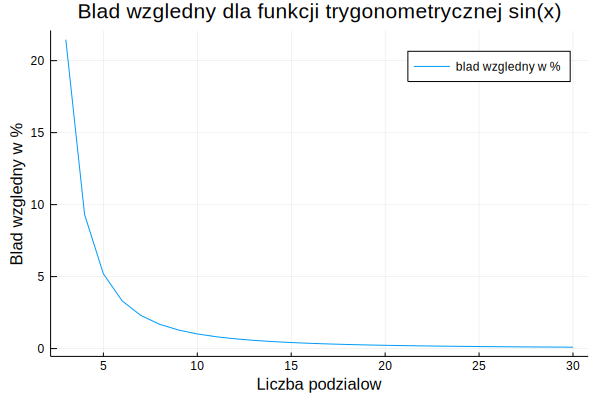

In [212]:
first = 3
last = 30
degree = 1
y = zeros(last-first+1)
err = zeros(last-first+1)
err_ = zeros(last-first+1)
println("Podziały \tBŁĄD WZGLĘDNY [%]:")
f(x) = sin(x)
exact = -cos(pi)+cos(0)
for i in first:last
    y[i-first+1] = integrate_trapezoidal(f, i, 0, pi)
    err[i-first+1] = abs(y[i-first+1]-exact)
end
for i in (first):last
    err_[i-first+1] = err[i-first+1]/exact
    println(i, ":\t",err_[i-first+1]*100 )
end
plot(3:30, err_*100, label="blad wzgledny w %",title="Blad wzgledny dla funkcji trygonometrycznej sin(x)", xlabel="Liczba podzialow", ylabel="Blad wzgledny w %")

### Wnioski:
Jak można zaobserwować na powyższych wykresach, błąd względny szybko maleje wraz ze zwiększaniem liczby podziałów przy całkowaniu metodą trapezów. W przypadku funkcji trygonometrycznej $sin(x)$ na przedziale $[0, \pi]$ wartość całki jest względnie dokładniejsza niż ma to miejsce w przypadku funkcji wykładniczej. 